# 442 Poisson Fit

In [51]:

import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle
from ROOT import gROOT
from array import array

In [52]:
def getValues(filename):
    try:
        file = open(filename, 'r')
    except IOError:
        print "Problem with the", filename
    values =[]
    for line in file:
        values.append(int(line))
    return values    

In [53]:
values = getValues('ba1s.txt')
print values

[3, 4, 6, 6, 8, 7, 8, 3, 3, 2, 9, 8, 4, 3, 10, 8, 3, 6, 4, 12, 6, 0, 2, 2, 7, 7, 4, 3, 12, 5, 5, 9, 4, 10, 5, 4, 4, 7, 5, 7, 10, 4, 8, 7, 6, 8, 3, 4, 5, 3, 1, 8, 5, 4, 4, 7, 12, 3, 8, 6, 5, 8, 6, 2, 4, 5, 6, 6, 9, 7, 4, 3, 2, 9, 4, 5, 8, 6, 8, 4, 12, 2, 4, 3, 9, 1, 8, 9, 7, 4, 3, 6, 7, 5, 3, 10, 5, 2, 4, 6]


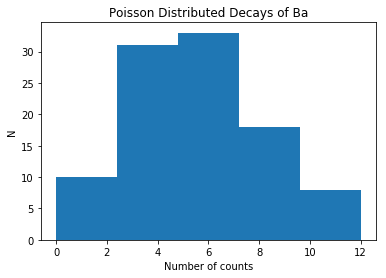

In [54]:
x = plt.figure()
plt.hist(values,5)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Poisson Distributed Decays of Ba")
plt.show()
x.savefig('ba1.eps',format='eps',dpi=1000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).
Info in <TCanvas::Print>: eps file ba1_1.eps has been created


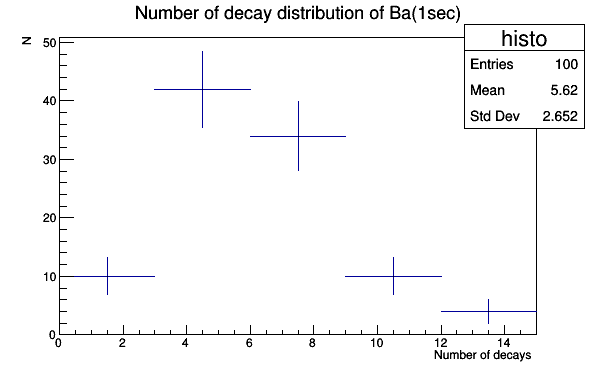

In [55]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change these values according to your data sets!!!)
histo = TH1F("histo", "Number of decay distribution of Ba(1sec)", 5, 0, 15) 

#Label the X-Y axis
histo.GetYaxis().SetTitle("N")
histo.GetXaxis ().SetTitle ("Number of decays ");

#Fill the randomly generated data into your histogram
for data_point in values:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.Draw("E")
c1.Draw()
c1.SaveAs("ba1_1.eps")

 FCN=2.8568 FROM MINOS     STATUS=SUCCESSFUL     26 CALLS          97 TOTAL
                     EDM=1.51266e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.91623e+02   2.95882e+01   5.79803e-02  -2.46806e-08
   2  p1           6.04850e+00   2.98023e-01   2.98023e-01  -2.38885e-07


Info in <TCanvas::Print>: eps file ba1_2.eps has been created


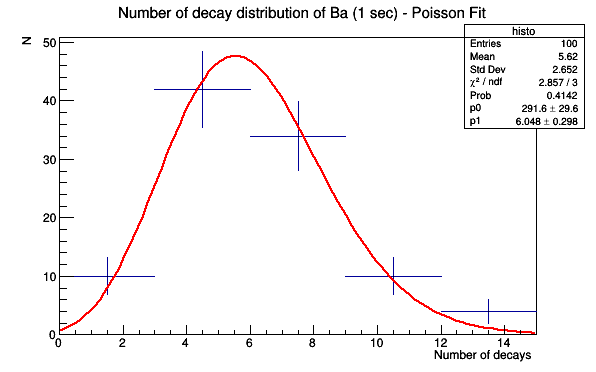

In [56]:
# Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",0,15) #(Change interval values (60,120) according to your data sets!!!)

#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(4, 7) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(41);
histo.Fit("fpois", "E")
histo.SetTitle("Number of decay distribution of Ba (1 sec) - Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)

c1.Draw()
c1.SaveAs("ba1_2.eps")

 FCN=3.29701 FROM MINOS     STATUS=SUCCESSFUL     64 CALLS         253 TOTAL
                     EDM=6.94486e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.30722e+01   6.16168e+00  -2.87804e-02  -2.07103e-05
   2  Mean         5.93204e+00   2.93554e-01  -2.80260e-03   2.54686e-04
   3  Sigma        2.71672e+00   2.93624e-01   2.93624e-01  -5.79474e-05


Info in <TCanvas::Print>: eps file ba1_3.eps has been created


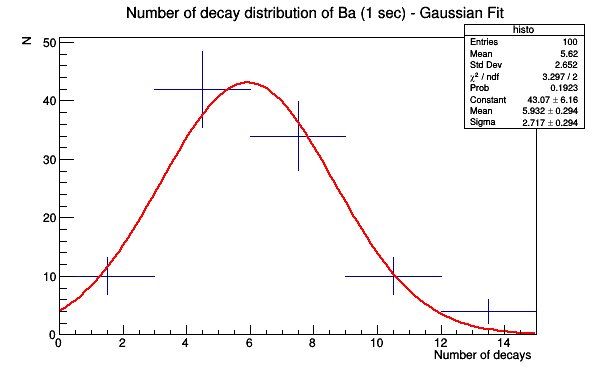

In [57]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(4, 7) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")
histo.SetTitle("Number of decay distribution of Ba (1 sec) - Gaussian Fit")
#histo.Draw("same")
c1.Draw("same")
c1.SaveAs("ba1_3.eps")